In [67]:
# Load packages and DF
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

ptbdb_abnormal_df = pd.read_csv("ptbdb_abnormal.csv")
ptbdb_normal_df = pd.read_csv("ptbdb_normal.csv")

In [2]:
# PTBDB Normal
new_column_names = range(1, len(ptbdb_normal_df.columns) + 1)
ptbdb_normal_df.columns = new_column_names
#ptbdb_normal_df.head()
ptbdb_normal_df[188].describe()

count    4045.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: 188, dtype: float64

In [3]:
# PTBDB Abnormal
new_column_names = range(1, len(ptbdb_abnormal_df.columns) + 1)
ptbdb_abnormal_df.columns = new_column_names
#ptbdb_abnormal_df.head()
ptbdb_abnormal_df[188].describe()
#ptbdb_abnormal_df.isna().sum().sum()

count    10505.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: 188, dtype: float64

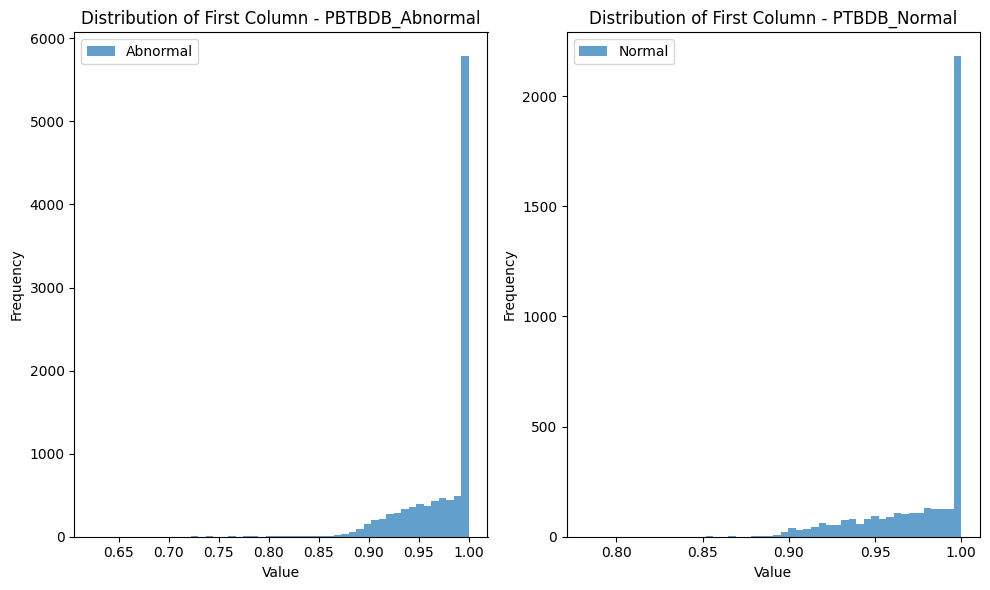

In [4]:
# PTBDB Verteilung Spalte 1
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(ptbdb_abnormal_df.iloc[:, 0], bins=50, alpha=0.7, label='Abnormal')
plt.title('Distribution of First Column - PBTBDB_Abnormal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ptbdb_normal_df.iloc[:, 0], bins=50, alpha=0.7, label='Normal')
plt.title('Distribution of First Column - PTBDB_Normal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [64]:
ptbdb_comb_df = pd.concat([ptbdb_normal_df, ptbdb_abnormal_df], ignore_index=True)
# ptbdb_comb_df[1].value_counts()
ptbdb_comb_df[188]=ptbdb_comb_df[188].astype(int)
ptbdb_comb_df.describe()
#ptbdb_comb_df.isna().sum().sum()
#ptbdb_comb_df.shape
#ptbdb_comb_df[188].value_counts()

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
count,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,...,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.0,14550.000000
mean,0.976638,0.721640,0.403068,0.242859,0.207181,0.216410,0.221718,0.224457,0.227325,0.229684,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721993
std,0.034532,0.195694,0.249779,0.249466,0.218030,0.192331,0.180687,0.176900,0.176642,0.176557,...,0.021363,0.021014,0.017317,0.014641,0.014034,0.012290,0.006545,0.006836,0.0,0.448032
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959381,0.584500,0.212294,0.052278,0.061899,0.090473,0.096495,0.097092,0.097225,0.097127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740115,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881478,0.557741,0.336155,0.264083,0.264610,0.286449,0.302235,0.311657,0.325235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [63]:
ptbdb_comb_df.max().max()
ptbdb_comb_df.min().min()

0.0

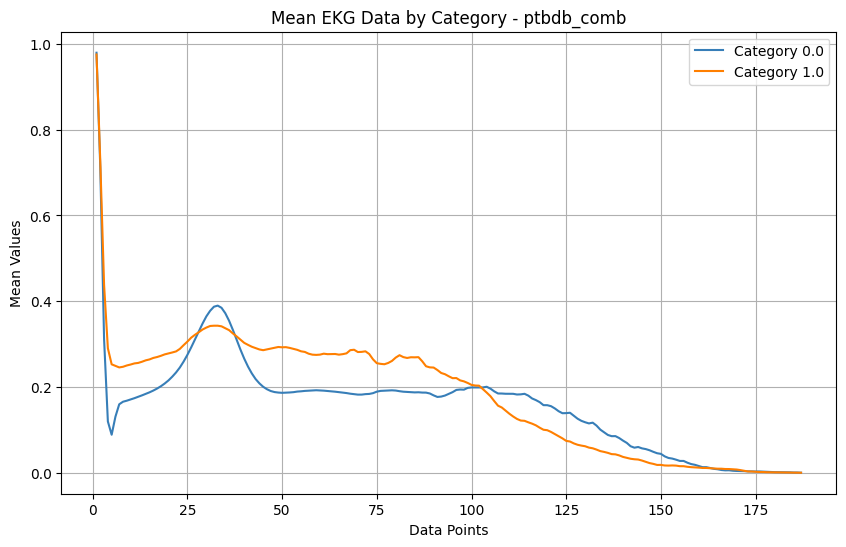

In [6]:
# Grafic representation of the Categories - ptbdb_comb
# Group by the category in the column named '188'
grouped = ptbdb_comb.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
# Plot the means for each category
plt.figure(figsize=(10, 6))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category {category}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - ptbdb_comb')
plt.legend()
plt.grid(True)
plt.show()

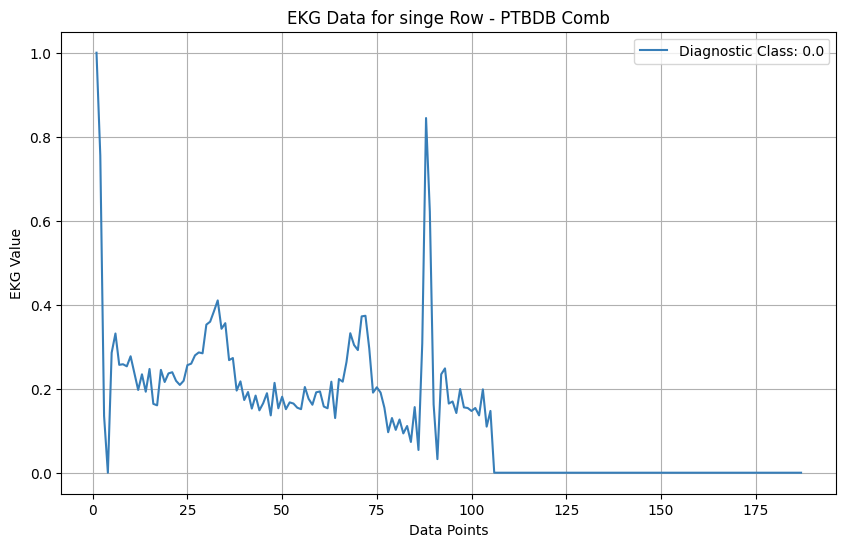

In [56]:
# PTBDB Comb - Single row plot

#Choose Row to display: 
row_to_display = 7

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), ptbdb_comb.iloc[row_to_display, :187], 
         label= f"Diagnostic Class: {ptbdb_comb.iloc[row_to_display, 187]}" , color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title('EKG Data for singe Row - PTBDB Comb')
plt.legend()
plt.grid(True)
plt.show();

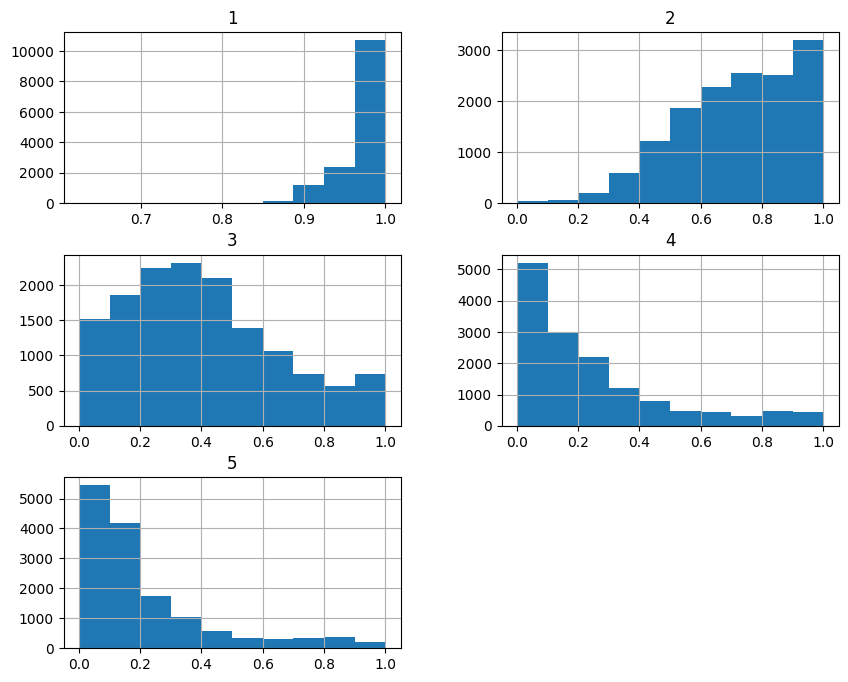

In [65]:
ptbdb_comb_df.iloc[:, :5].hist(figsize=(10, 8))
plt.show()

In [66]:
# t-Test between the two groups
normal = ptbdb_normal_df.iloc[:, :-1]
abnormal = ptbdb_abnormal_df.iloc[:, :-1]

# t-Test for the first row: 
t_stat, p_val = stats.ttest_ind(normal.iloc[:, 0], abnormal.iloc[:, 0])
print(f't-Test Ergebnis: t_stat = {t_stat}, p_val = {p_val}')

NameError: name 'stats' is not defined